<h1 align="center"><font size="8">Unupervised Machine Learning: Clustering with Country Data</font></h1>
<h1 align="center"><font size="5">Tiange Cui</font></h1>

# I. About the Data
The dataset is from `Kaggle` Country Data by Rohan kokkula
<br>
<br>
This country dataset is from HELP International.
<br><br>
https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
<br>
### Data Description
The data contains 167 countries and 9 attributes

- country : Name of the country<br><br>

- child_mort : Death of children under 5 years of age per 1000 live births
- exports : Exports of goods and services per capita. Given as %age of the GDP per capita
- health : Total health spending per capita. Given as %age of GDP per capita
- imports : Imports of goods and services per capita. Given as %age of the GDP per capita
- Income : Net income per person
- Inflation : The measurement of the annual growth rate of the Total GDP
- life_expec : The average number of years a new born child would live if the current mortality patterns are to rem...
- total_fer : The number of children that would be born to each woman if the current age-fertility rates remain th...
- gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.

# II. Problem Statement
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# III. Objective
- Use unsupervised clustering algorithms to cluster countries based on numerical features.
- To find out which countries need the aid from HELP International the most.

# IV. EDA

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### There are 1 categorical column and 9 numerical columns

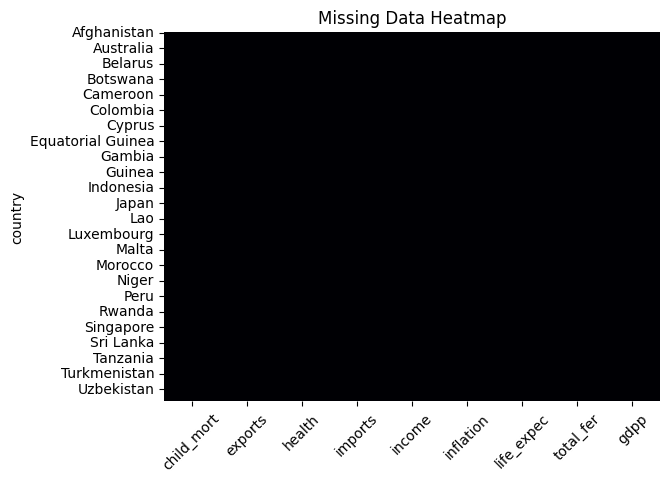

In [5]:
df = data.copy().set_index('country')
ax = sns.heatmap(df.isnull(), cmap='magma', cbar=False)
ax.set_title('Missing Data Heatmap')
plt.xticks(rotation=45)

# Force all y-axis labels (country names) to be shown
# Get current tick positions
# tick_positions = np.arange(0.5, len(data.index), 1)
# ax.set_yticks(tick_positions)
# ax.set_yticklabels(data.index, rotation=0) 

plt.show()

#### There are no missing values in the data

In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
colors = ['#FF781F','#2D2926']

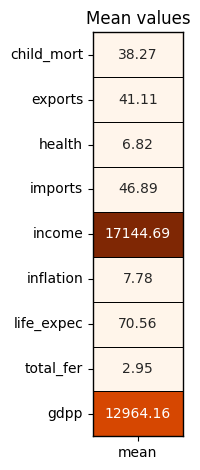

In [8]:
# plt.figure(figsize=[6, 6])
ax = sns.heatmap(data.describe().T[['mean']], cmap = 'Oranges', annot = True, fmt = '.2f', linecolor = 'black', linewidths = 0.4, cbar = False)
plt.title("Mean values")

# Enable and customize all four spines (borders)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)

ax.set_aspect(0.5)
plt.tight_layout() 
plt.show()

### Separate Categorical and Numerical Features

In [9]:
col = data.columns.tolist()
categorical_features = data.select_dtypes(exclude='number').columns.tolist()
numerical_features = [item for item in col if item not in categorical_features]
print(f"Categorical Features: {categorical_features}")
print(f"Numerical Features: {numerical_features}")

Categorical Features: ['country']
Numerical Features: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


### Check the distribution of Features
- with `distplot`

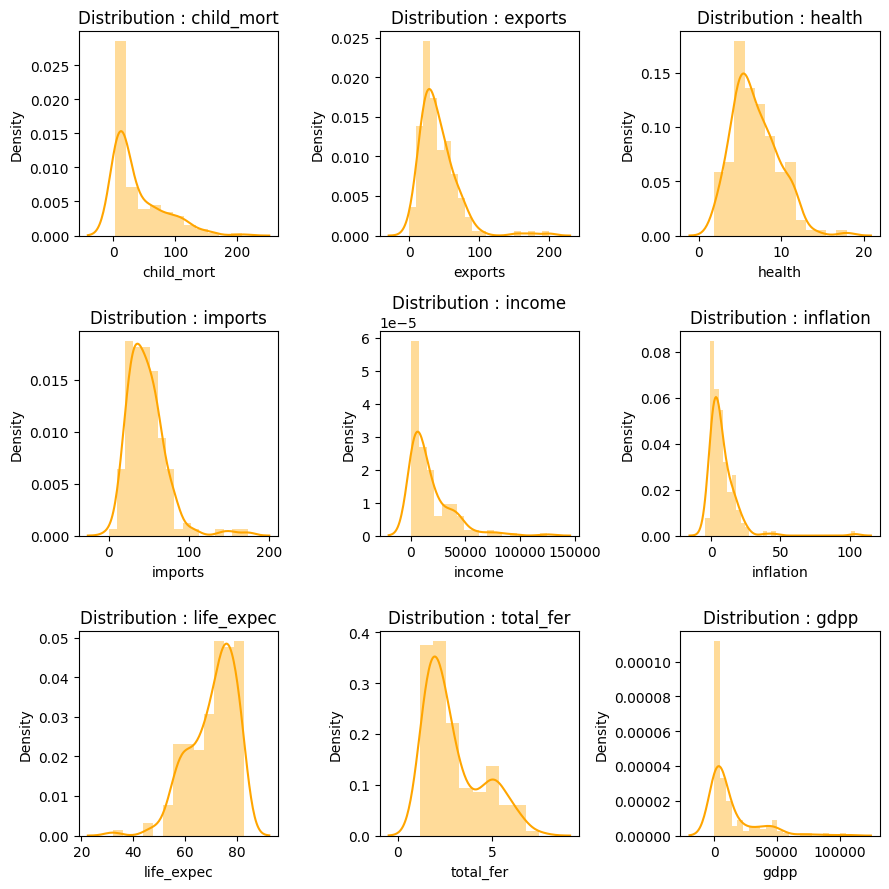

In [10]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (9,9))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]],color = "orange")
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.tight_layout()
plt.show()

- with `histplot`

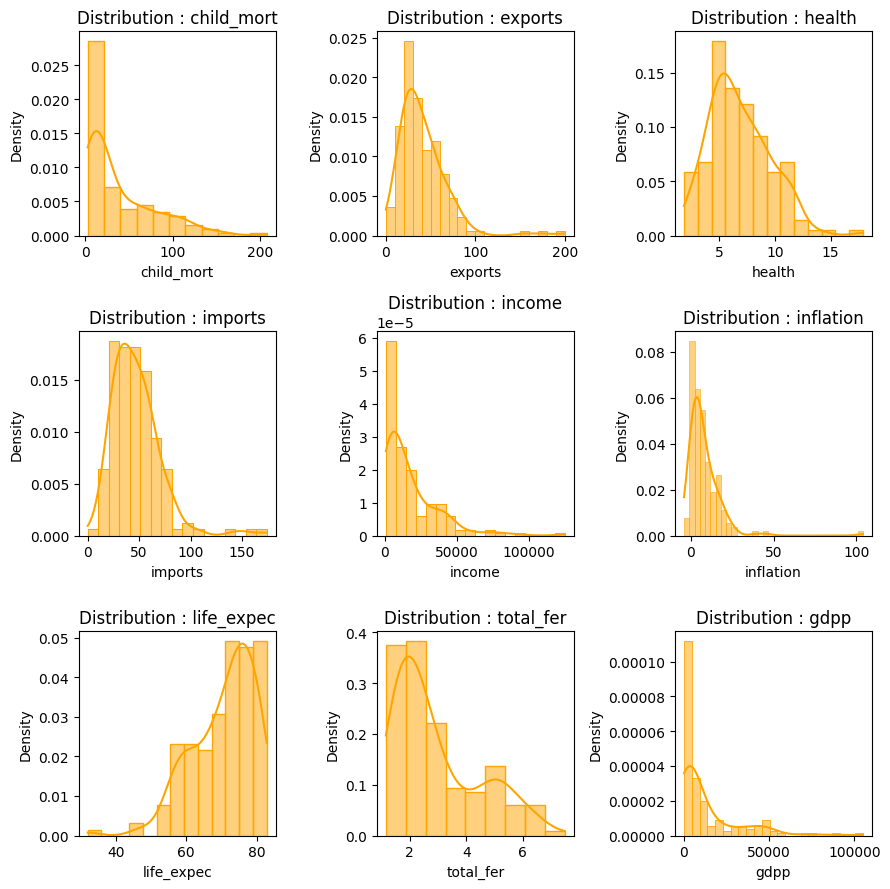

In [11]:
fig = plt.subplots(nrows = 3, ncols = 3, figsize = (9,9))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.histplot(data[numerical_features[i]], kde=True, color="orange", stat="density",edgecolor="orange")
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.tight_layout() 
plt.show()

- with `histplot` and adjust `bw_adjust` value

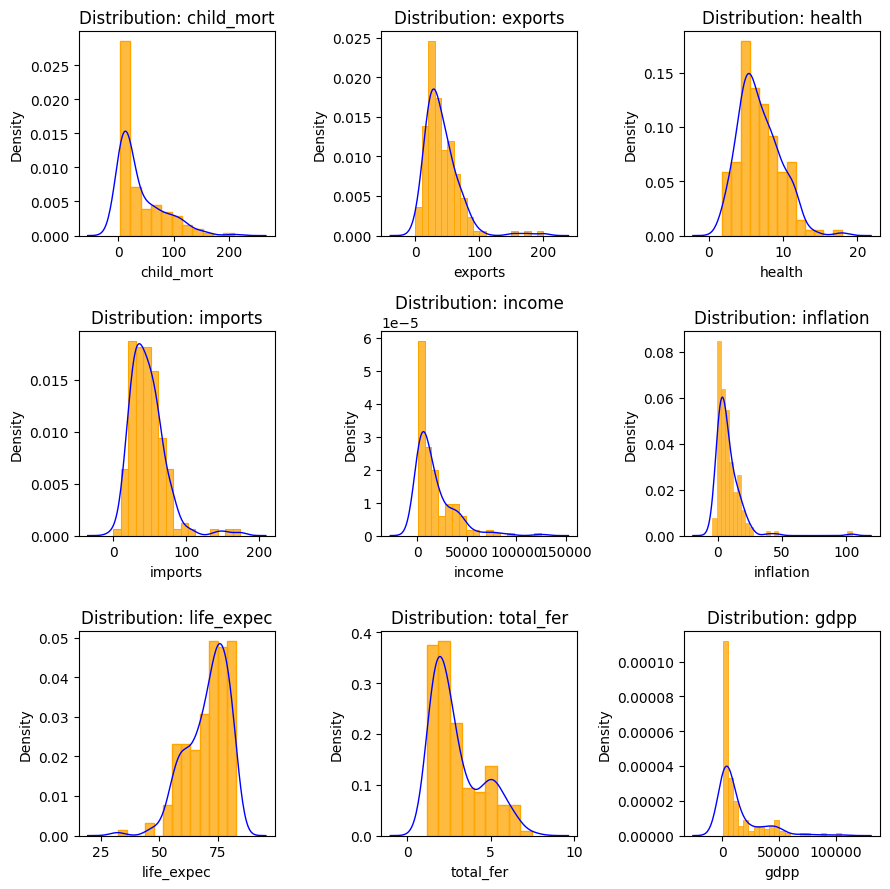

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
axes = axes.flatten()  # Flatten subplot axes

for i, feature in enumerate(numerical_features):
    if feature not in data.columns:
        print(f"Warning: {feature} not found in data!")
        continue  # Skip missing columns
    
    # Plot histogram without KDE
    sns.histplot(data[feature], color="orange", stat="density", edgecolor="orange", ax=axes[i])

    # Overlay KDE with extended range beyond first bin
    sns.kdeplot(data[feature], color="blue", ax=axes[i], bw_adjust=1, cut=4, linewidth=1)

    axes[i].set_title(f'Distribution: {feature}')

plt.tight_layout()
plt.show()

### Check the Numerical Features

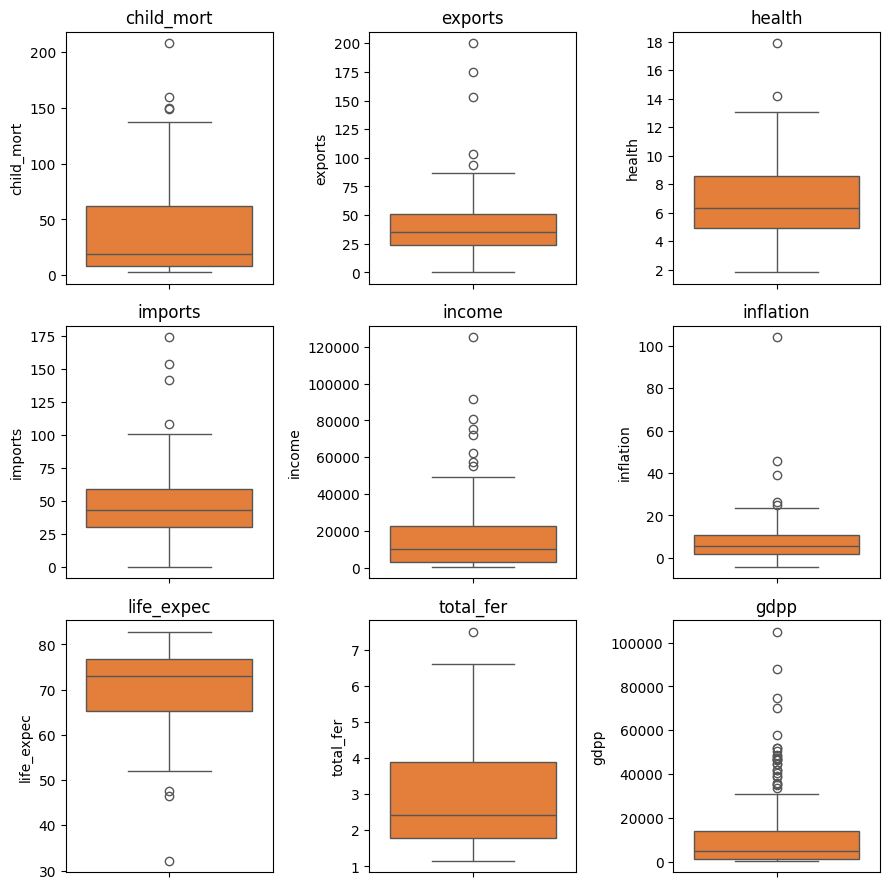

In [13]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (9,9))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]], color = '#FF781F')
    plt.title(numerical_features[i])

plt.tight_layout()
plt.show()

### Check the rankings of the `Children Mortality`

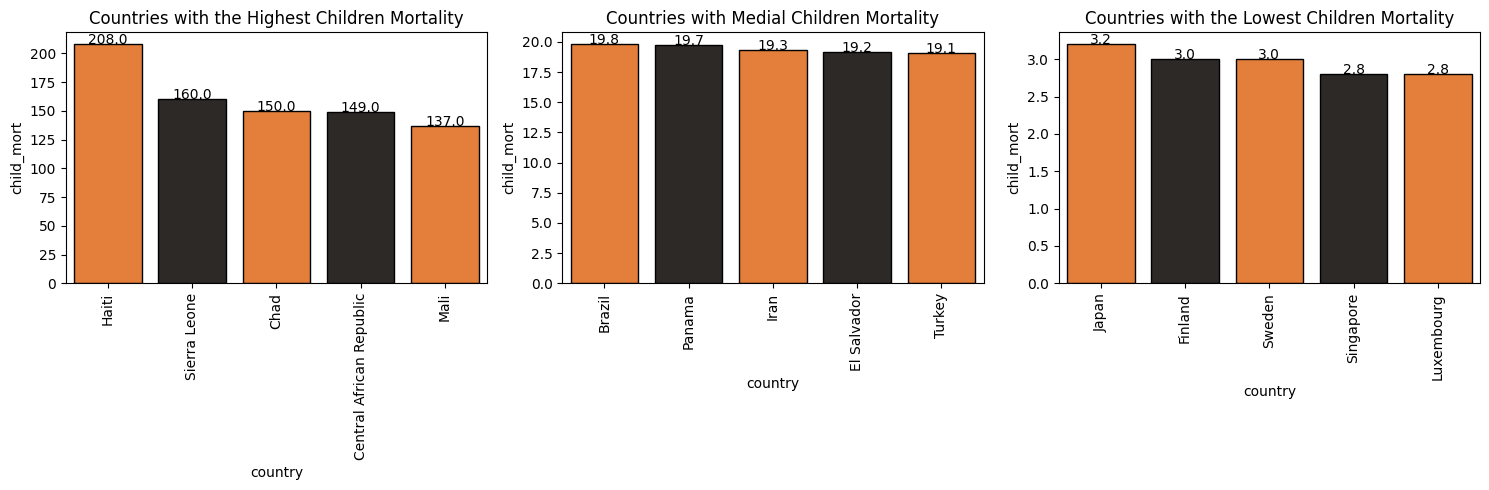

In [14]:
colors = ['#FF781F','#2D2926']
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with the Highest Children Mortality')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Children Mortality')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[-6:-1],palette = colors,edgecolor = 'black');
plt.title('Countries with the Lowest Children Mortality')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Check the rankings of the `Exports(%)`

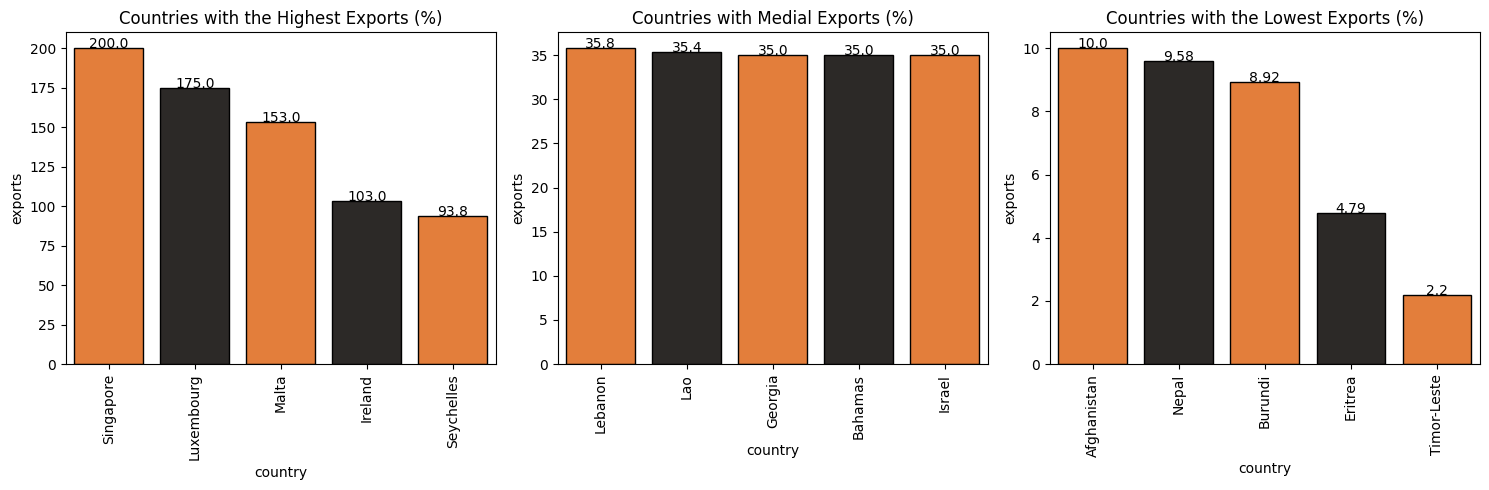

In [15]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with the Highest Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[-6:-1],palette = colors,edgecolor = 'black');
plt.title('Countries with the Lowest Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Check the rankings of the `Health Spending (%)`

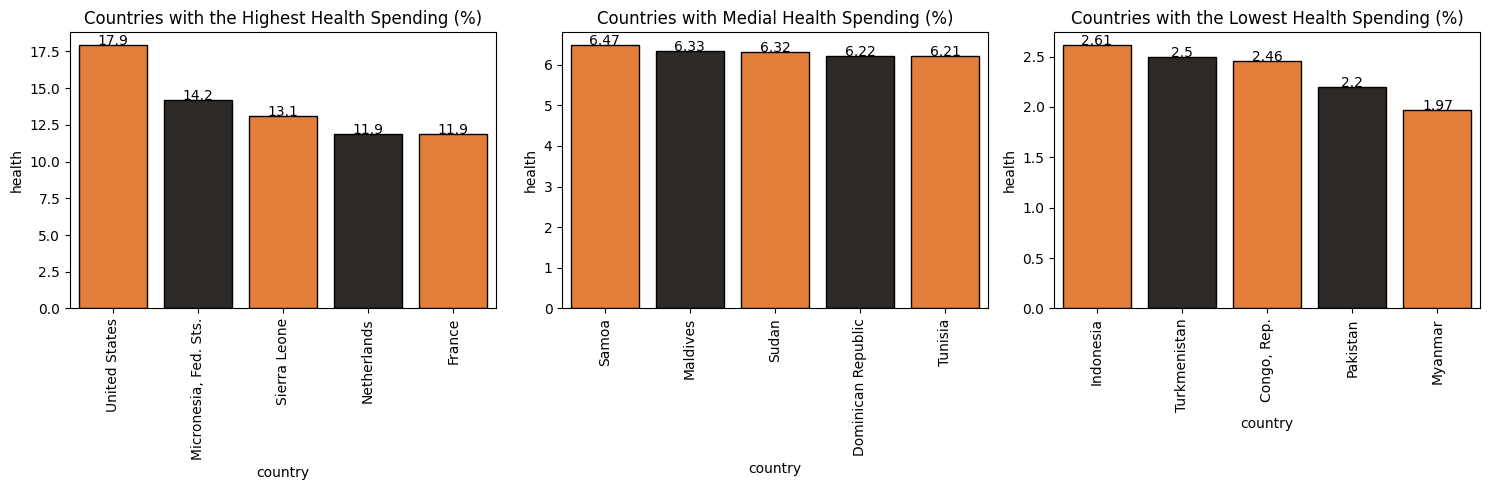

In [16]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with the Highest Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[-6:-1],palette = colors,edgecolor = 'black');
plt.title('Countries with the Lowest Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Check the rankings of the `Imports (%)`

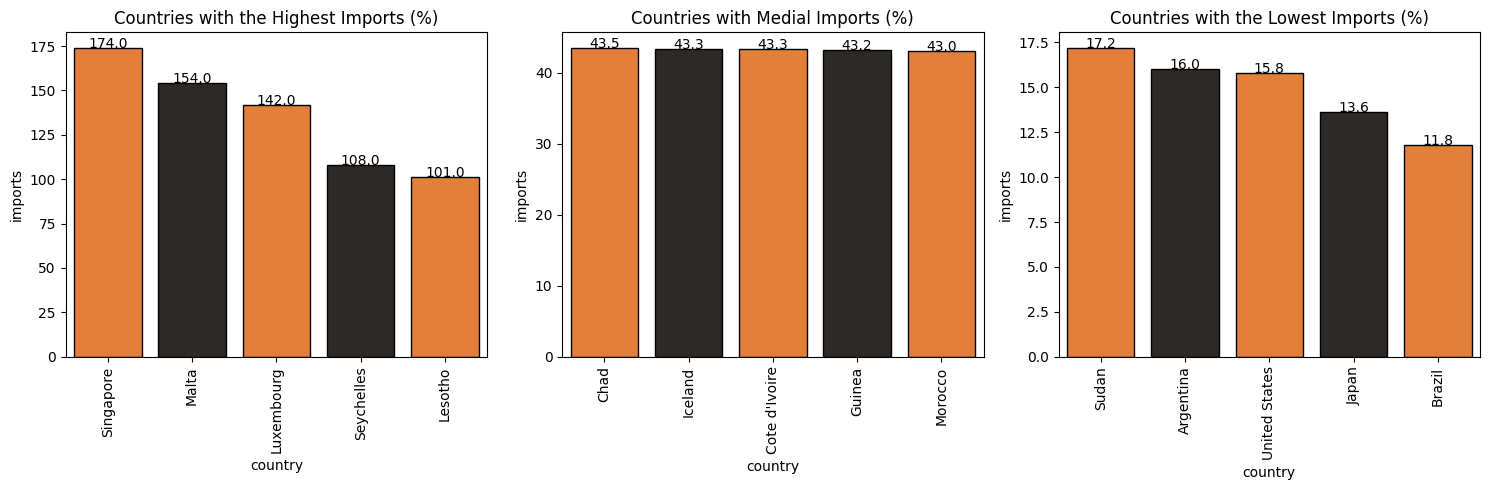

In [17]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with the Highest Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[-6:-1],palette = colors,edgecolor = 'black');
plt.title('Countries with the Lowest Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Check the rankings of the `Income/Person`

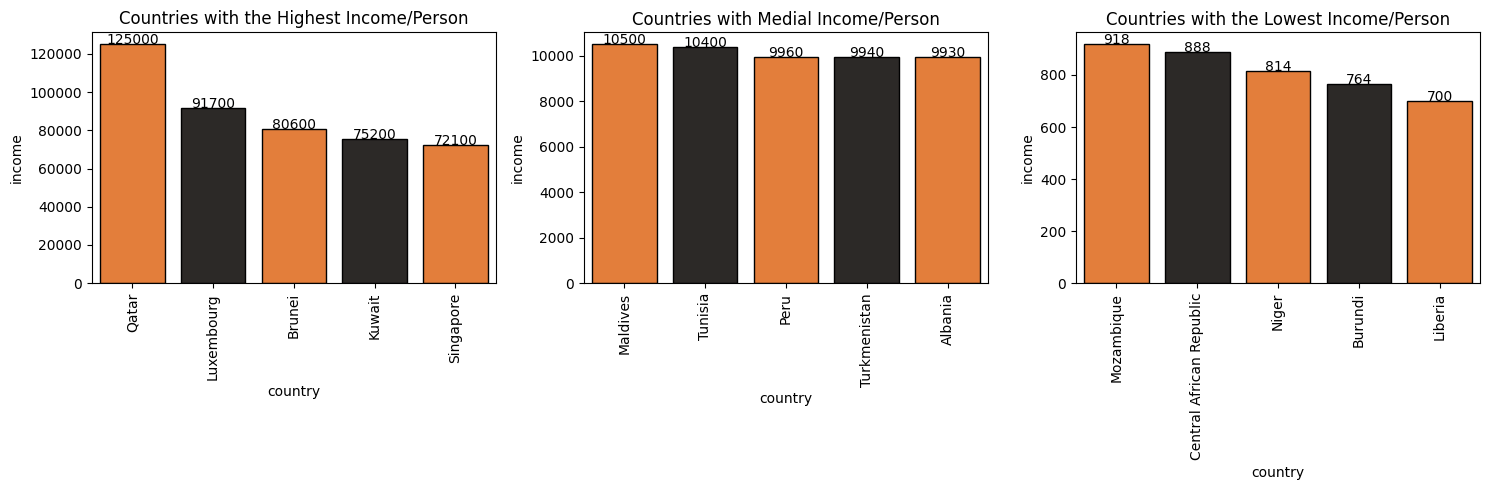

In [18]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with the Highest Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[-6:-1],palette = colors,edgecolor = 'black');
plt.title('Countries with the Lowest Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Check the rankings of the `Inflation`

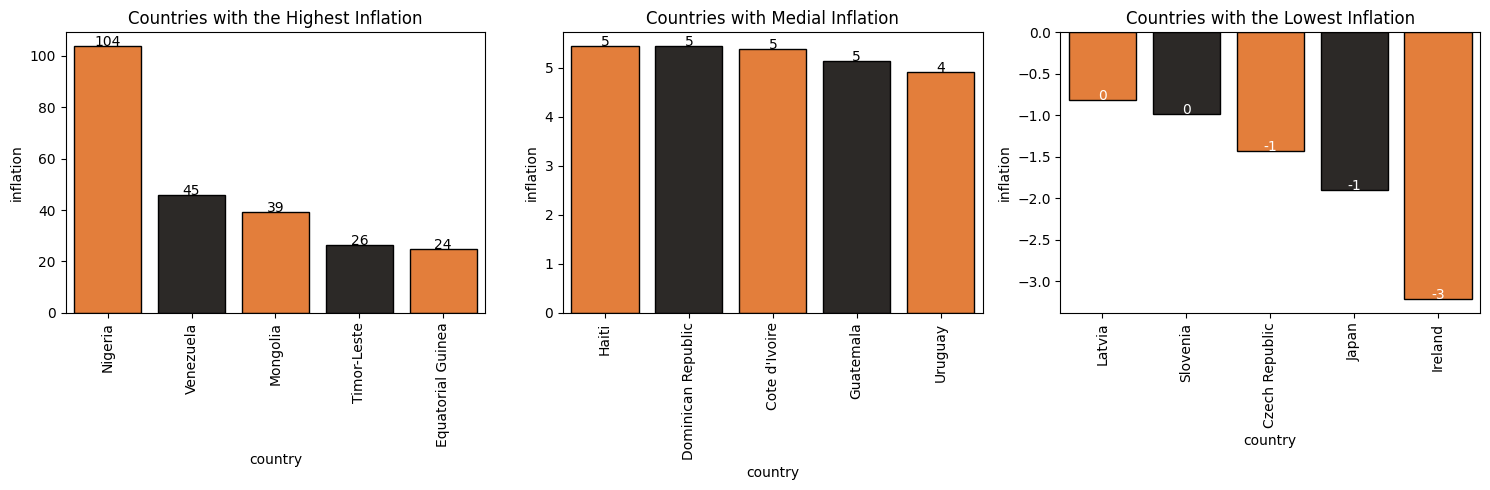

In [19]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with the Highest Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[-6:-1],palette = colors,edgecolor = 'black');
plt.title('Countries with the Lowest Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 10, color="white")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Check the rankings of the `Life Expectancy`

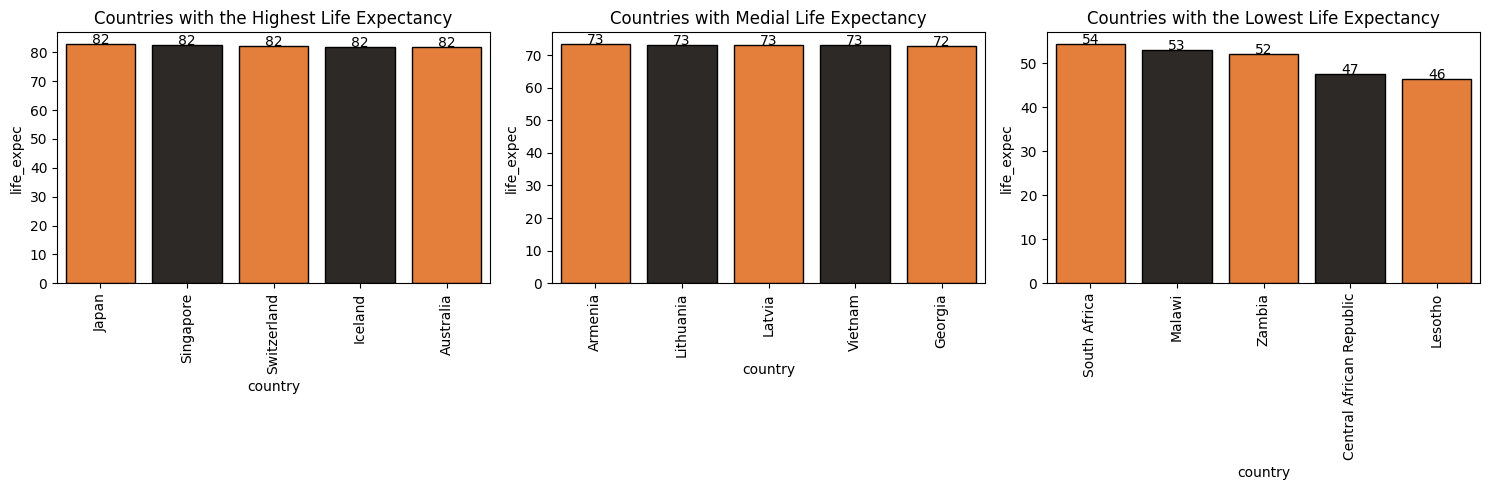

In [20]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with the Highest Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[-6:-1],palette = colors,edgecolor = 'black');
plt.title('Countries with the Lowest Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Check the rankings of the `Female Fertility Rate`

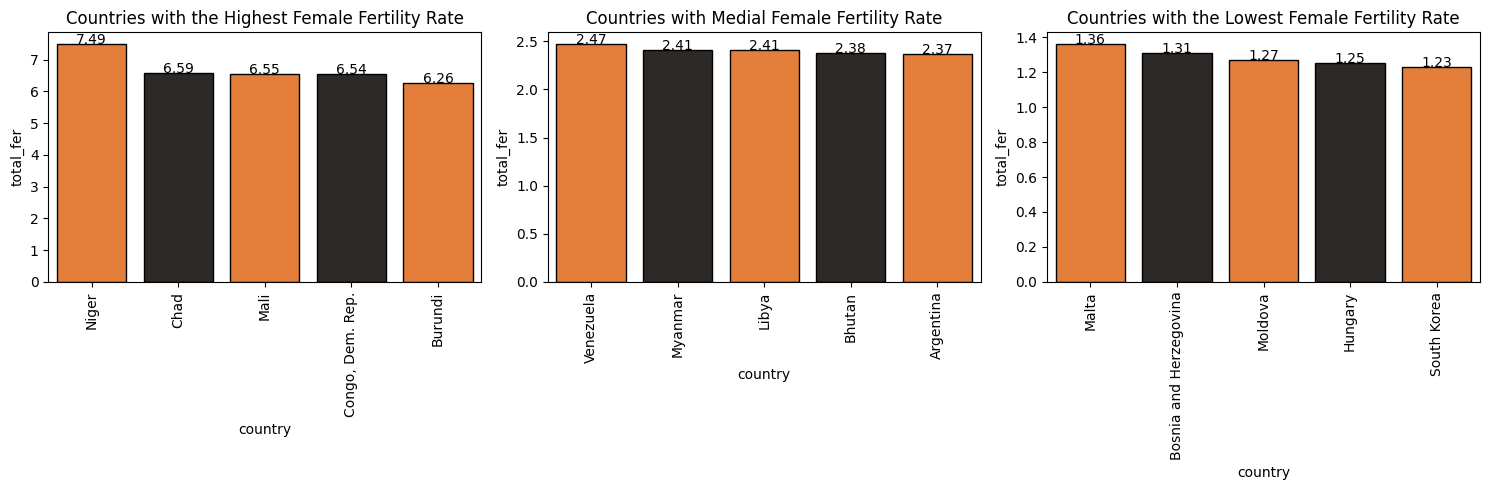

In [21]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with the Highest Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[-6:-1],palette = colors,edgecolor = 'black');
plt.title('Countries with the Lowest Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Check the rankings of the `GDP Contribution/Person`

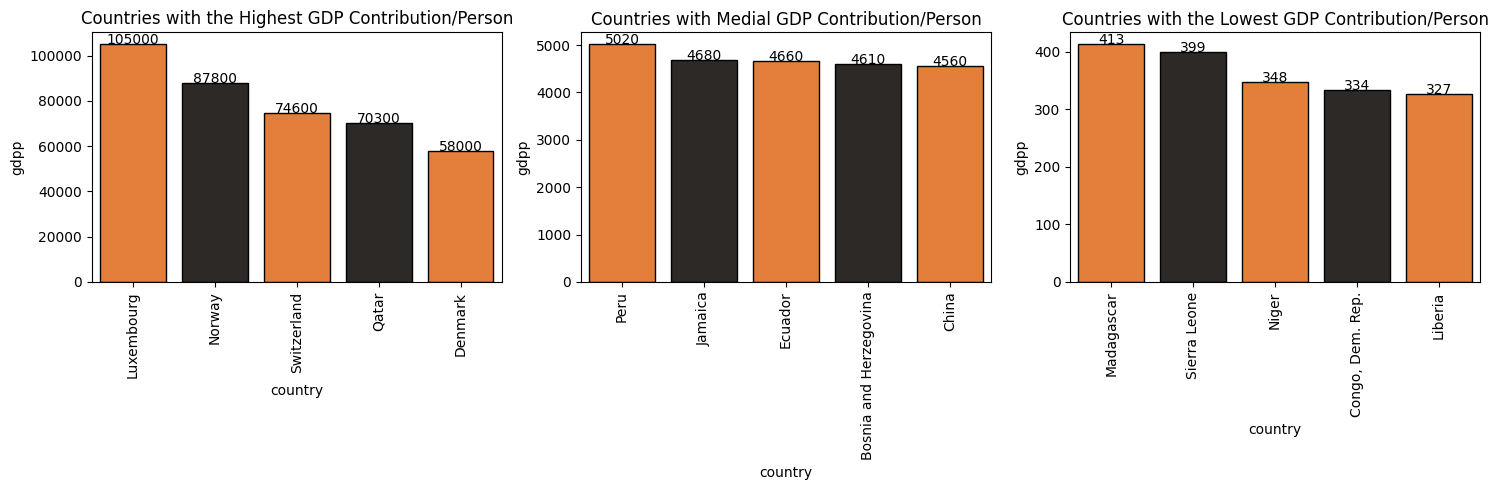

In [22]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with the Highest GDP Contribution/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial GDP Contribution/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[-6:-1],palette = colors,edgecolor = 'black');
plt.title('Countries with the Lowest GDP Contribution/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 10)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Generate Correlation Matrix to Check for Correlations Between Numerical Features

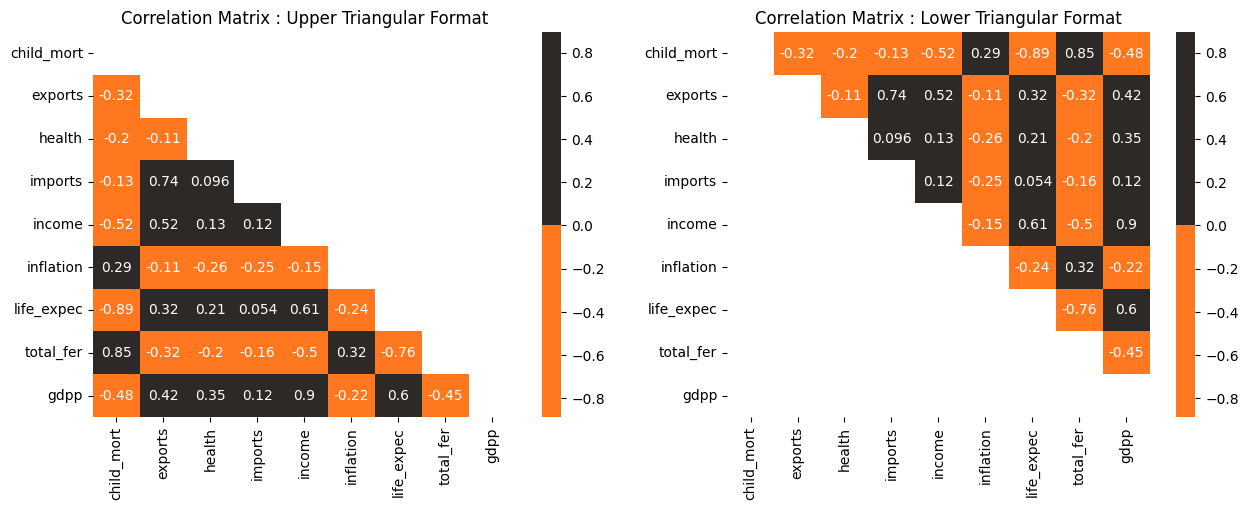

In [23]:
corr_matrix = data.select_dtypes(include=['number']).corr()

ut = np.triu(corr_matrix)
lt = np.tril(corr_matrix)

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(corr_matrix ,cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(corr_matrix ,cmap = colors,annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

# V. Feature Engineering

## Feature Reduction and Normalization
Based on how features correlate, they can be divided into 3 categories:
- `Health`  : child_mort, health, life_expec, total_fer
- `Trade`   : imports, exports
- `Finance` : income, inflation, gdpp

In [24]:
df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df1['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
df1

,Health,Trade,Finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150
...,...,...,...
162,3.613452,2.257474,0.737840
163,3.073747,1.068624,7.902084
164,3.309933,3.461820,1.917840
165,4.771970,1.463396,3.395058


## Data Scaling - Normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler() # Normalization

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(data['country']), column = 'Country')
df1

,Country,Health,Trade,Finance
0,Afghanistan,0.625740,0.139614,0.079820
1,Albania,0.127451,0.199901,0.088756
2,Algeria,0.182485,0.186622,0.212808
3,Angola,0.661381,0.283058,0.236946
4,Antigua and Barbuda,0.116409,0.275189,0.145043
...,...,...,...,...
162,Vanuatu,0.217274,0.262886,0.035009
163,Venezuela,0.133337,0.124193,0.559740
164,Vietnam,0.170070,0.403386,0.121436
165,Yemen,0.397451,0.170248,0.229632


## Data Scaling - Standarization

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # Standardization

df2 = data.copy(deep = True)

col = list(data.columns)
col.remove('health'); col.remove('country')

# health is normally distributed
df2['health'] = ss.fit_transform(df2[['health']]) # Standardization

for i in col:
    df2[i] = mms.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True) 
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,-0.571711,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,-0.695862,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.008877,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,-0.597272,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


## Dimensionality Reduction with Principal Component Analysis (PCA)

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

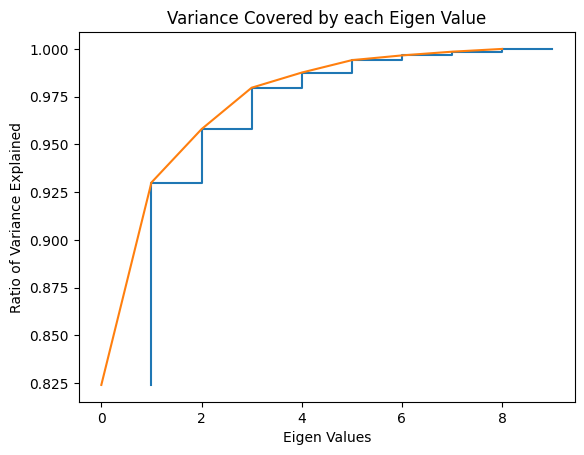

In [28]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [29]:
# Typically eigen values with more than 95% of ratio of variance are selected
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2

,0,1,2
0,0.220482,0.640048,0.086112
1,-0.080903,-0.172000,-0.208695
2,-0.961283,-0.125199,-0.126719
3,-1.505914,0.472144,0.284978
4,-0.264724,-0.237308,-0.059150
...,...,...,...
162,-0.584662,0.089055,-0.023372
163,-0.689176,-0.151368,-0.165444
164,0.012693,-0.123744,-0.023656
165,-0.628317,0.259154,-0.017196


### Creating Two Dataframes for Clustering:
- `m1` - Data with combined features: Health, Trade, Finance
- `m2` - Data with all features and processed by PCA

In [30]:
# Feature Combination : Health - Trade - Finance
m1 = df1.drop(columns = ['Country']).values

# PCA data
m2 = pca_df2.values

# Modeling with Different Clustering Algorithms

## 1. K-Means Clustering (Distance based Clustering)
### - Use Feature Combination (Health - Trade - Finance) Data

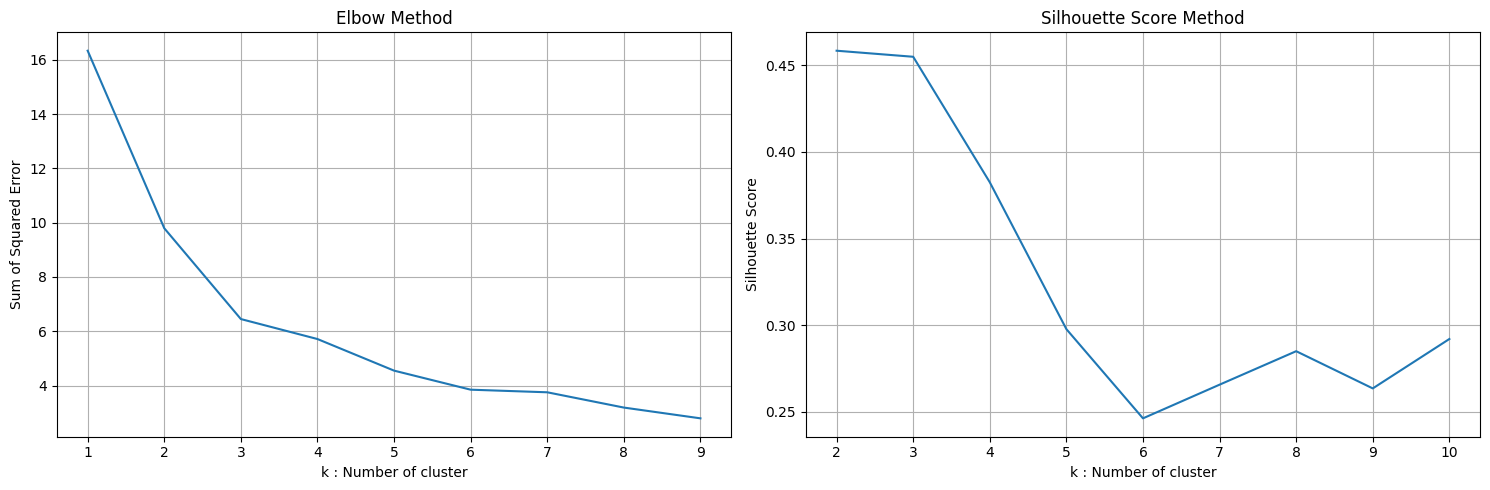

In [31]:
sse = {} # sum of squared error
sil = [] # silhouette score
kmax = 10  
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.tight_layout()
plt.show()

#### From the results of the above 2 methods, select k : Clusters = 3

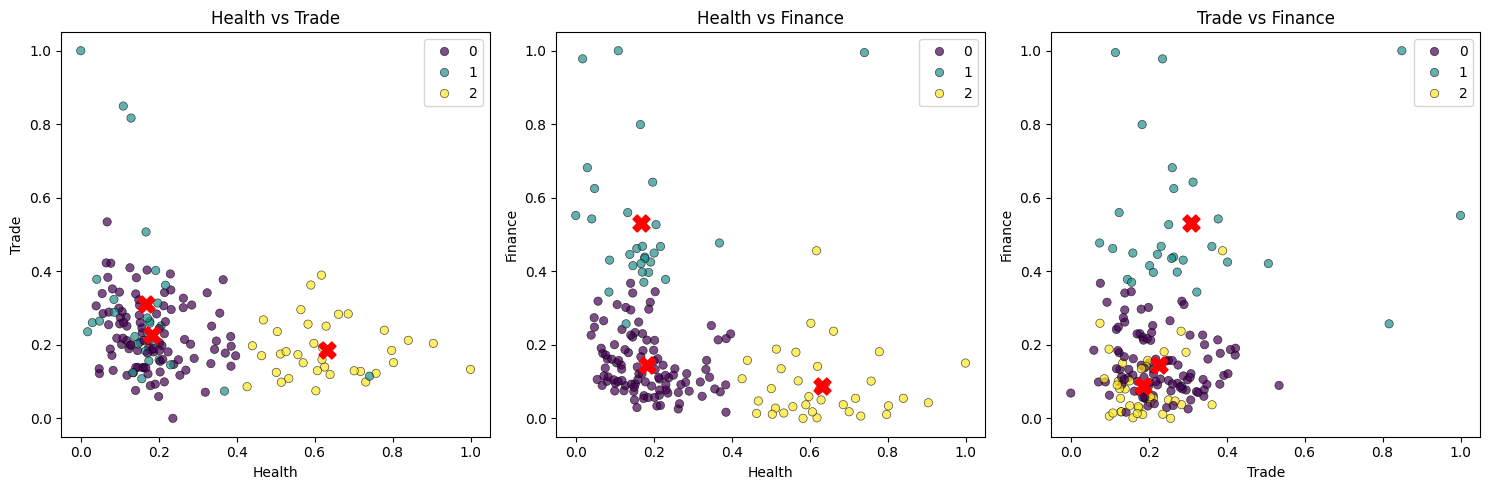

In [32]:
# Fit KMeans Model
model = KMeans(n_clusters=3, max_iter=1000, random_state=42)
model.fit(m1)

# Extract Clustering Info
labels = model.labels_
centroids = model.cluster_centers_

# Assign Cluster Labels
data['Class'] = labels
df1['Class'] = labels

# Extract Feature Data
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])

# Define Colors for Clusters
palette = sns.color_palette("viridis", as_cmap=True)

# Create Subplots for 2D Projections
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Health vs Trade
sns.scatterplot(x=x, y=y, hue=labels, palette="viridis", edgecolor='k', alpha=0.7, ax=axes[0])
axes[0].scatter(centroids[:, 0], centroids[:, 1], marker="X", color='red', s=150, label="Centroids")
axes[0].set_xlabel("Health")
axes[0].set_ylabel("Trade")
axes[0].set_title("Health vs Trade")

# Health vs Finance
sns.scatterplot(x=x, y=z, hue=labels, palette="viridis", edgecolor='k', alpha=0.7, ax=axes[1])
axes[1].scatter(centroids[:, 0], centroids[:, 2], marker="X", color='red', s=150, label="Centroids")
axes[1].set_xlabel("Health")
axes[1].set_ylabel("Finance")
axes[1].set_title("Health vs Finance")

# Trade vs Finance
sns.scatterplot(x=y, y=z, hue=labels, palette="viridis", edgecolor='k', alpha=0.7, ax=axes[2])
axes[2].scatter(centroids[:, 1], centroids[:, 2], marker="X", color='red', s=150, label="Centroids")
axes[2].set_xlabel("Trade")
axes[2].set_ylabel("Finance")
axes[2].set_title("Trade vs Finance")

# Adjust Layout and Show Plot
plt.tight_layout()
plt.show()


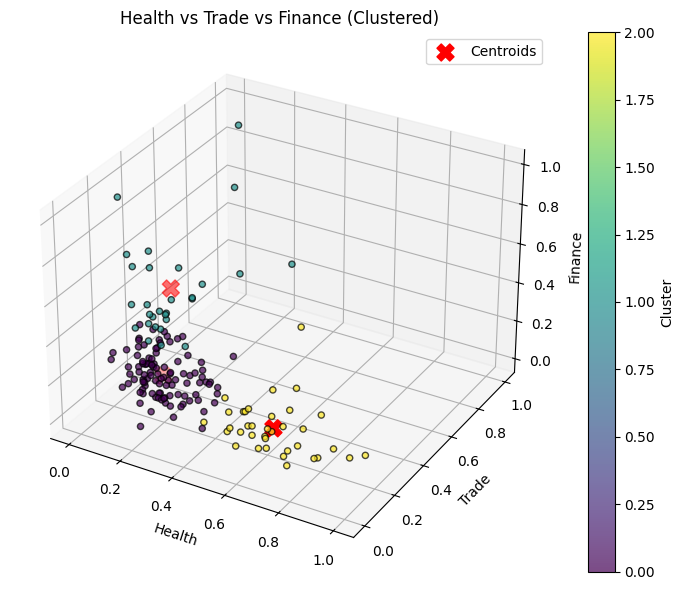

In [33]:
# K-Means Clustering
model = KMeans(n_clusters=3, max_iter=1000, random_state=42)
model.fit(m1)

# Extract Clustering Info
labels = model.labels_
centroids = model.cluster_centers_

# Assign Cluster Labels
data['Class'] = labels
df1['Class'] = labels

# Extract Feature Data
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])

# Create 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter Plot for Data Points
sc = ax.scatter(x, y, z, c=labels, cmap='viridis', edgecolor='k', alpha=0.7)

# Scatter Plot for Centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='red', s=150, label="Centroids")

# Labels and Title
ax.set_title('Health vs Trade vs Finance (Clustered)')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')

# Add Legend and Color Bar
plt.colorbar(sc, label="Cluster")
ax.legend()

plt.tight_layout()
plt.show()


#### Now we got the clusters but we don't know which one  corresponds to what, so we need to visualize them in the boxplot

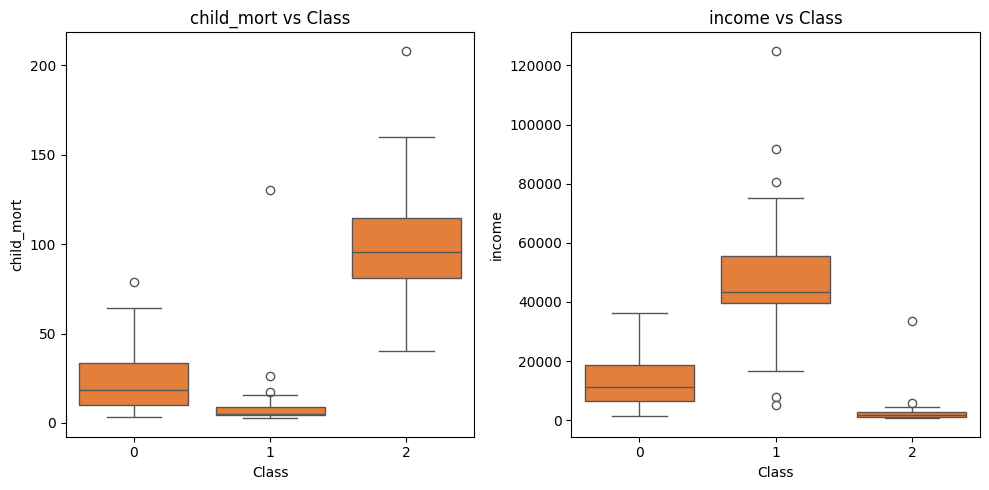

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.tight_layout()
plt.show()

#### Since we know that low income and high child mortality is a sign of an economically backward nation, and the opposite is a nation that doesn't really need help.
#### We can conclude that:
- 0 - Might need help
- 1 - No help needed
- 2 - Help needed

In [35]:
import plotly.express as px

df1['Class'].loc[df1['Class'] == 0] = 'Might Need Help'
df1['Class'].loc[df1['Class'] == 1] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Help Needed'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(width=800, height=400, legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

### - Use PCA Data

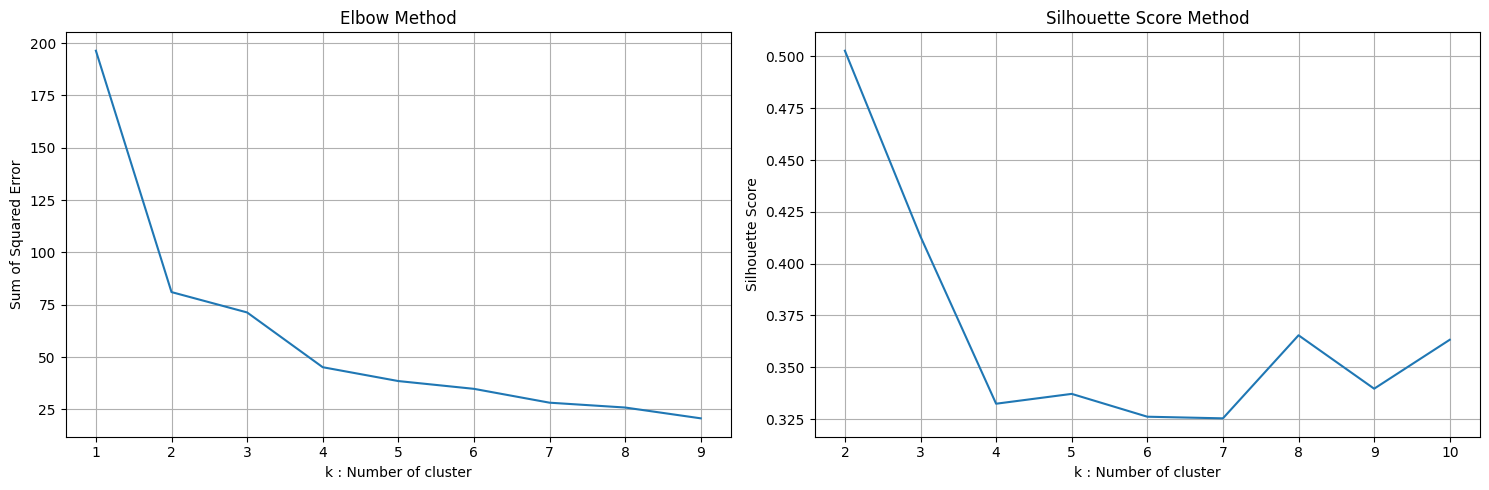

In [36]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.tight_layout()
plt.show()

#### From the results of the above 2 methods, select k : Clusters = 3

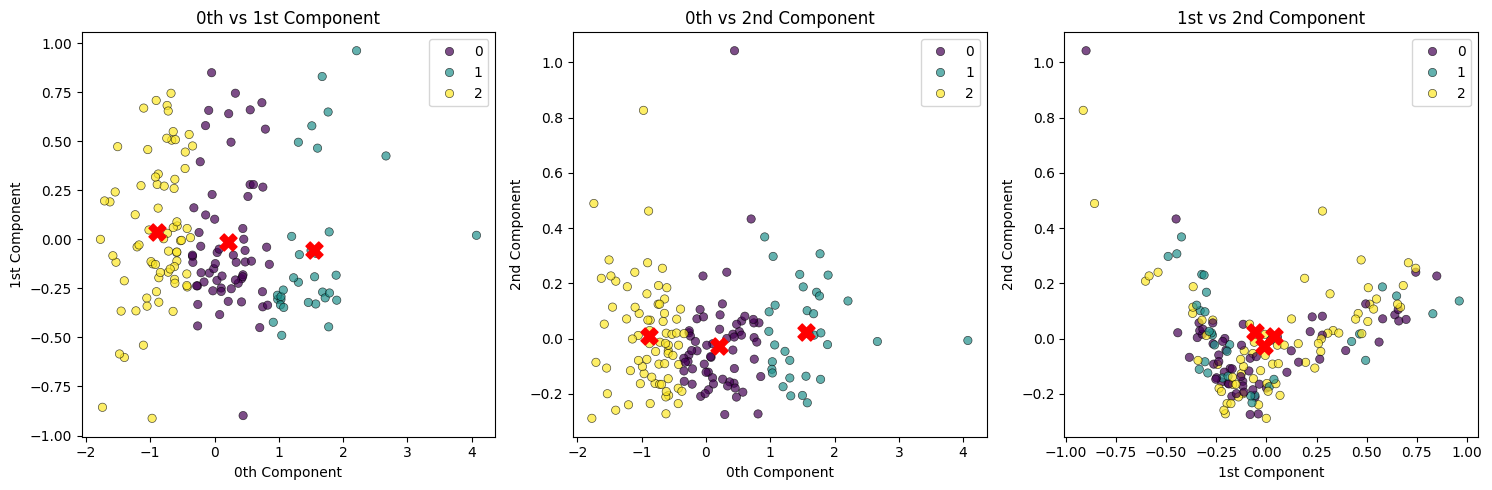

In [37]:
# Fit KMeans Model
model = KMeans(n_clusters=3, max_iter=1000, random_state=42)
model.fit(m2)

# Extract Clustering Info
labels = model.labels_
centroids = model.cluster_centers_

# Assign Cluster Labels
data['Class'] = labels
pca_df2['Class'] = labels

# Extract Feature Data
x = np.array(pca_df2[0])
y = np.array(pca_df2[1])
z = np.array(pca_df2[2])

# Define Colors for Clusters
palette = sns.color_palette("viridis", as_cmap=True)

# Create Subplots for 2D Projections
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Health vs Trade
sns.scatterplot(x=x, y=y, hue=labels, palette="viridis", edgecolor='k', alpha=0.7, ax=axes[0])
axes[0].scatter(centroids[:, 0], centroids[:, 1], marker="X", color='red', s=150, label="Centroids")
axes[0].set_xlabel("0th Component")
axes[0].set_ylabel("1st Component")
axes[0].set_title("0th vs 1st Component")

# Health vs Finance
sns.scatterplot(x=x, y=z, hue=labels, palette="viridis", edgecolor='k', alpha=0.7, ax=axes[1])
axes[1].scatter(centroids[:, 0], centroids[:, 2], marker="X", color='red', s=150, label="Centroids")
axes[1].set_xlabel("0th Component")
axes[1].set_ylabel("2nd Component")
axes[1].set_title("0th vs 2nd Component")

# Trade vs Finance
sns.scatterplot(x=y, y=z, hue=labels, palette="viridis", edgecolor='k', alpha=0.7, ax=axes[2])
axes[2].scatter(centroids[:, 1], centroids[:, 2], marker="X", color='red', s=150, label="Centroids")
axes[2].set_xlabel("1st Component")
axes[2].set_ylabel("2nd Component")
axes[2].set_title("1st vs 2nd Component")

# Adjust Layout and Show Plot
plt.tight_layout()
plt.show()

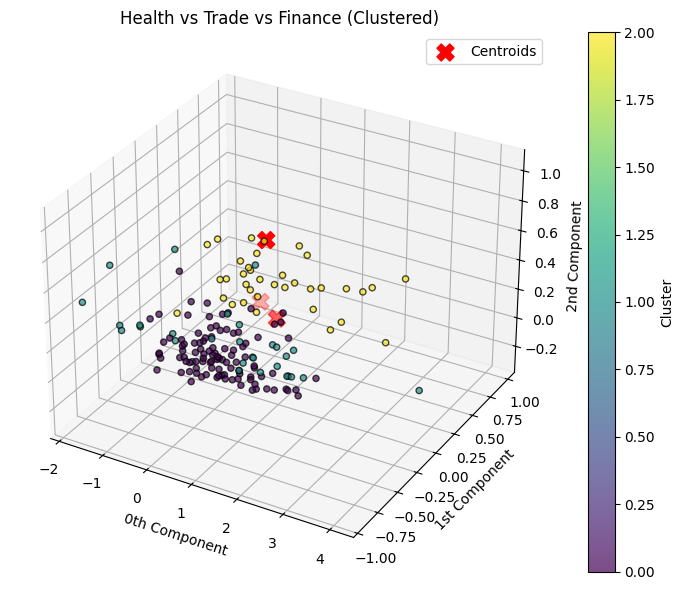

In [38]:
# K-Means Clustering
model = KMeans(n_clusters=3, max_iter=1000, random_state=42)
model.fit(m1)

# Extract Clustering Info
labels = model.labels_
centroids = model.cluster_centers_

# Assign Cluster Labels
data['Class'] = labels
pca_df2['Class'] = labels

# Extract Feature Data
x = np.array(pca_df2[0])
y = np.array(pca_df2[1])
z = np.array(pca_df2[2])

# Create 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter Plot for Data Points
sc = ax.scatter(x, y, z, c=labels, cmap='viridis', edgecolor='k', alpha=0.7)

# Scatter Plot for Centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='red', s=150, label="Centroids")

# Labels and Title
ax.set_title('Health vs Trade vs Finance (Clustered)')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')

# Add Legend and Color Bar
plt.colorbar(sc, label="Cluster")
ax.legend()

plt.tight_layout()
plt.show()


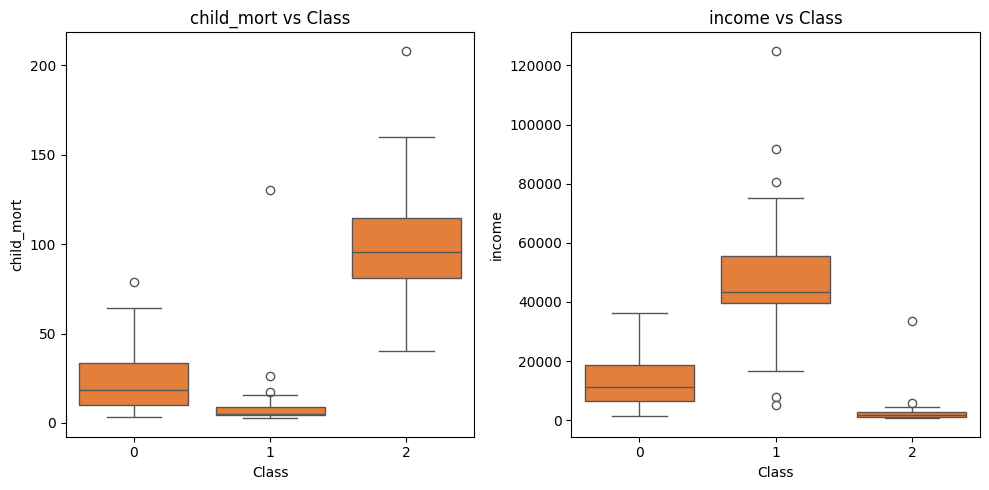

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.tight_layout()
plt.show()

#### Since we know that low income and high child mortality is a sign of an economically backward nation, and the opposite is a nation that doesn't really need help.
#### We can conclude that:
- 0 - Might need help
- 1 - No help needed
- 2 - Help needed

In [40]:
pca_df2.insert(loc = 0, value = list(data['country']), column = 'Country')
pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'No Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(width=800, height=400, legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

## 2. DBSCAN (Density based Spatial Clustering)

### - Use Feature Combination (Health - Trade - Finance) Data


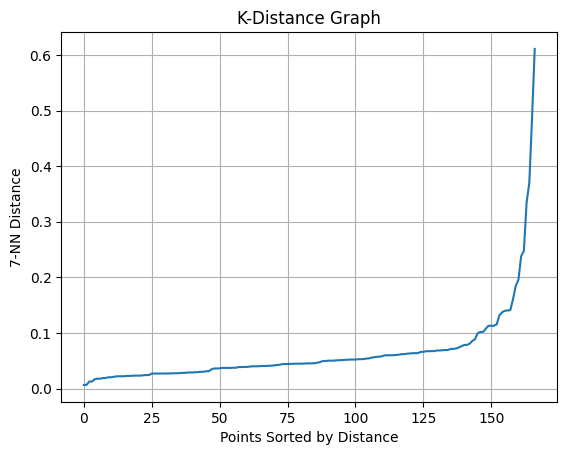

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# If D represents the number of dimensions/features of a dataset,
# then minPts >= D + 1. 
# Typically minPts >= 2 * D is selected for smaller or noisy datasets.
# We select minPts = 8, so >= 2 * 3 features
# n_neighbors : minPts - 1, so 8-1=7
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m1)
distances, indices = knn.kneighbors(m1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

#### From the graph above, select eps = 0.08

In [42]:
db = DBSCAN(eps = 0.08, min_samples = 8).fit(m1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels
df1['Class'] = labels

Number of Clusters :  3
Number of Outliers :  67


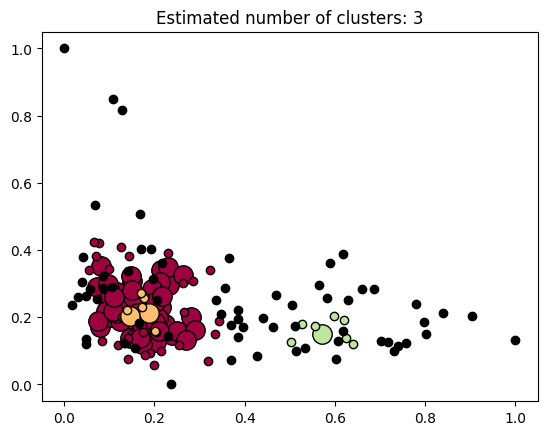

In [43]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

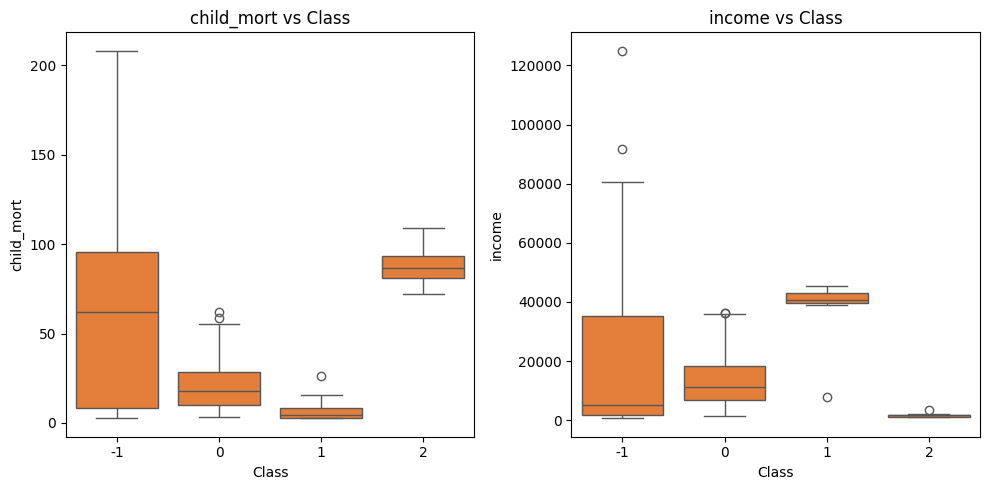

In [44]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.tight_layout()
plt.show()

#### From the above plot we can conclude :
- -1 : Noise / Outliers (By rule -1 is associated with Noise/Outliers)
-  0 : Might Need Help
-  1 : No Help Needed
-  2 : Help Needed

In [45]:
df1['Class'].loc[df1['Class'] == -1] = 'Noise / Outliers'
df1['Class'].loc[df1['Class'] == 0] = 'Might Need Help'
df1['Class'].loc[df1['Class'] == 1] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Help Needed'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map = {'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(width=800, height=400, legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

### - Use PCA Data

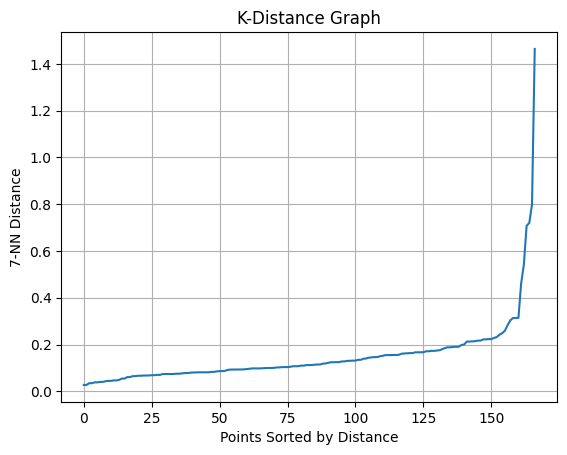

In [46]:
# We select minPts = 8, so >= 2 * 3 features
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m2)
distances, indices = knn.kneighbors(m2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');
plt.grid()
plt.plot(distances);

#### From the graph above, select eps = 0.2

In [47]:
db = DBSCAN(eps = 0.2, min_samples = 8).fit(m2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels
pca_df2['Class'] = labels

Number of Clusters :  3
Number of Outliers :  94


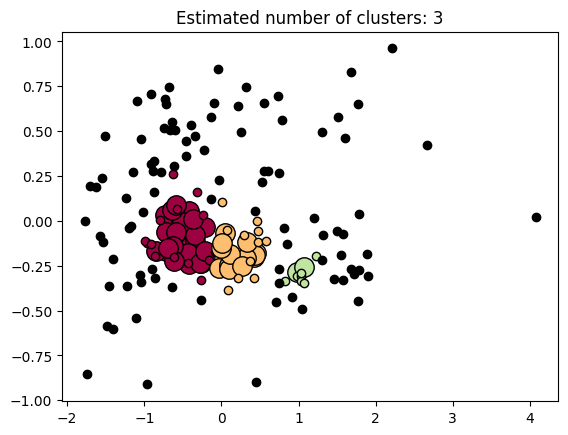

In [48]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

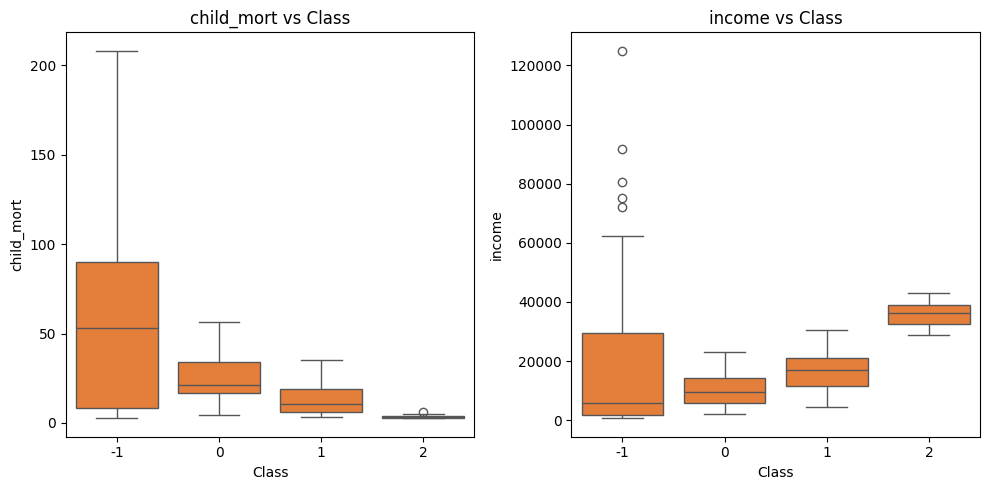

In [49]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.tight_layout()
plt.show()

#### From the above plot we can conclude :
- -1 : Noise / Outliers (By rule -1 is associated with Noise/Outliers)
-  0 : Help Needed
-  1 : Might Need Help
-  2 : No Help Needed

In [50]:
pca_df2['Class'].loc[pca_df2['Class'] == -1] = 'Noise / Outliers'
pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],  
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(width=800, height=400, legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

## 3. Hierarchical Clustering (Distanced based Clustering using Agglomerative Clustering)
### - Use Feature Combination (Health - Trade - Finance) Data

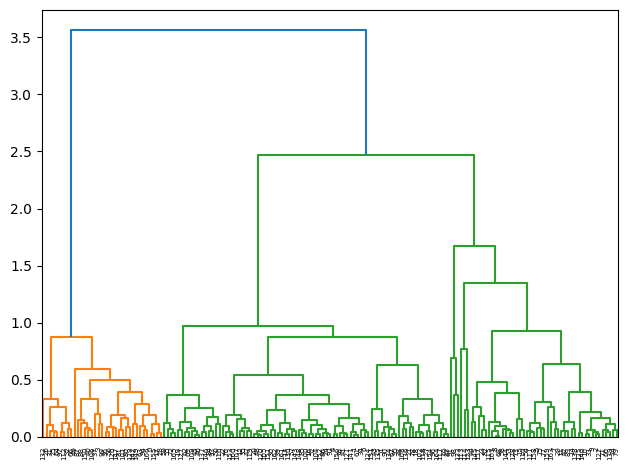

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(m1, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

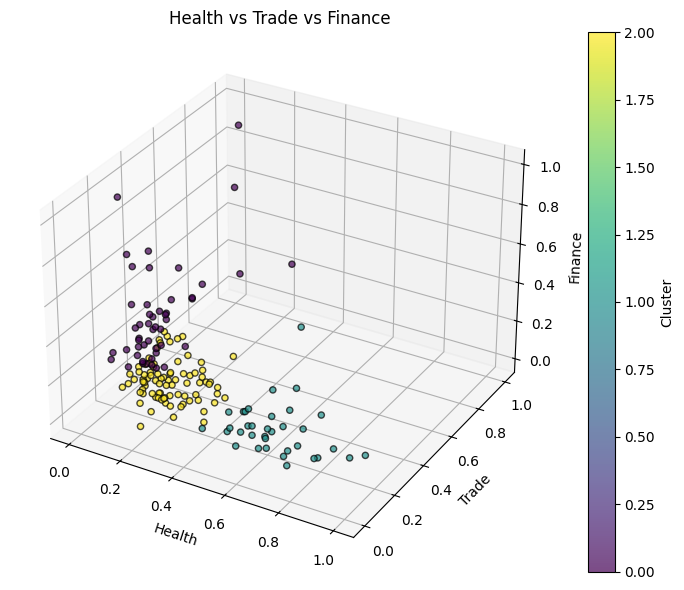

In [52]:
from sklearn.cluster import AgglomerativeClustering


hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
hierarchical_cluster.fit(m1)
labels = hierarchical_cluster.labels_

pred_agc = pd.Series(labels)
data['Class'] = pred_agc
df1['Class'] = pred_agc

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract Feature Data
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])

# Scatter Plot for Data Points
sc = ax.scatter(x, y, z, c=labels, cmap='viridis', edgecolor='k', alpha=0.7)

# Labels and Title
ax.set_title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')

# Add Color Bar
plt.colorbar(sc, label="Cluster")

plt.tight_layout()
plt.show()


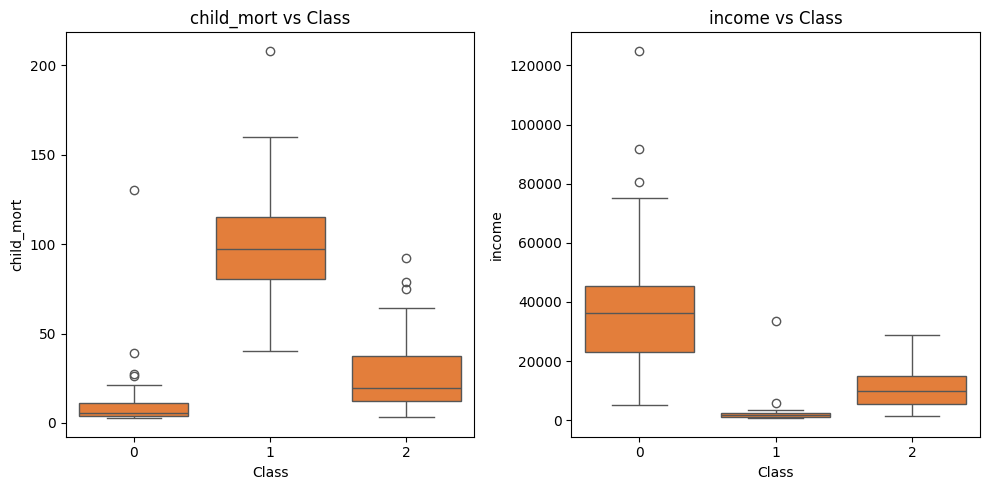

In [53]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.tight_layout()
plt.show()

#### From the above plot we can conclude :
-  0 : No Help Needed
-  1 : Help Needed
-  2 : Might Need Help

In [54]:
df1['Class'].loc[df1['Class'] == 0] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map = {
                                        'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(width=800, height=400, legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

### - Use PCA Data

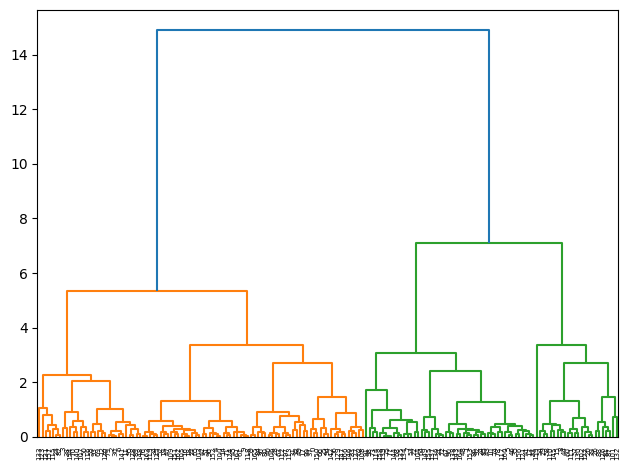

In [55]:
linkage_data = linkage(m2, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

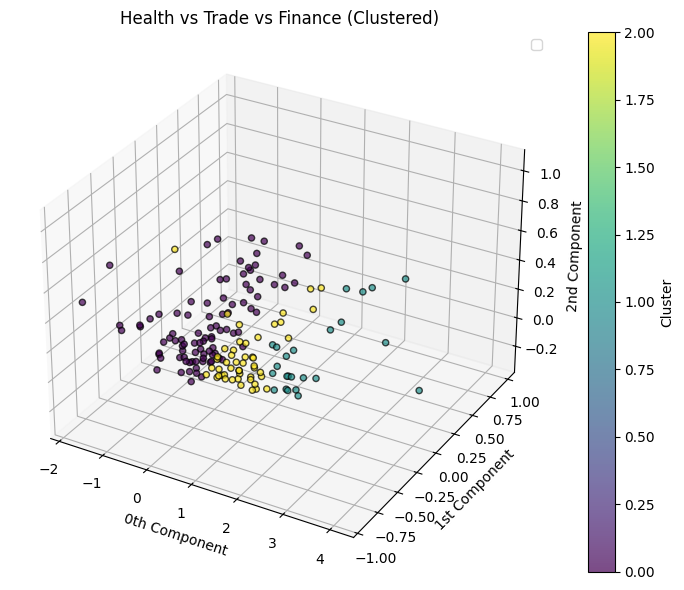

In [56]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, metric= 'euclidean', linkage = 'ward')
hierarchical_cluster.fit(m2)
labels = hierarchical_cluster.labels_

pred_agc = pd.Series(labels)
data['Class'] = pred_agc
pca_df2['Class'] = pred_agc

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract Feature Data
x = np.array(pca_df2[0])
y = np.array(pca_df2[1])
z = np.array(pca_df2[2])

# Scatter Plot for Data Points
sc = ax.scatter(x, y, z, c=labels, cmap='viridis', edgecolor='k', alpha=0.7)

# Labels and Title
ax.set_title('Health vs Trade vs Finance (Clustered)')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')

# Add Legend and Color Bar
plt.colorbar(sc, label="Cluster")
ax.legend()

plt.tight_layout()
plt.show()


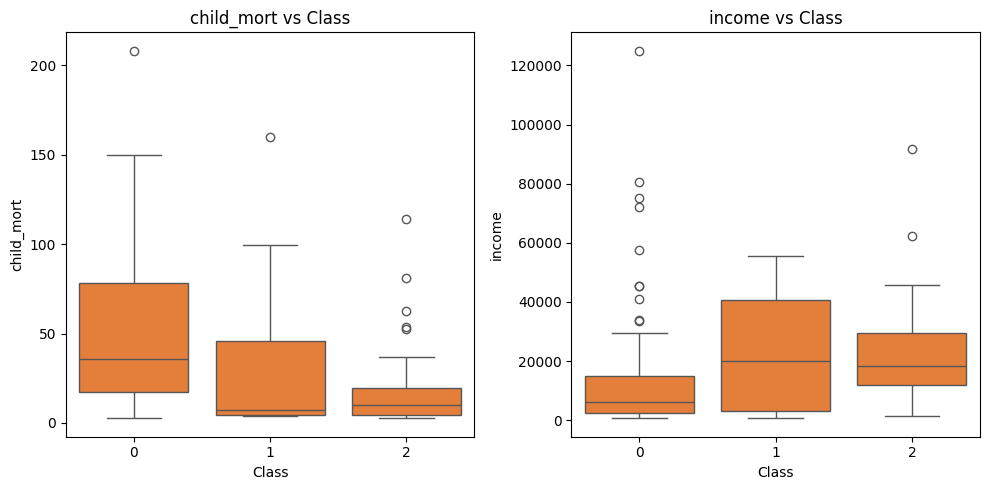

In [57]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.tight_layout()
plt.show()

#### From the above plot we can conclude :
- 0 : Help Needed
- 1 : Might Need Help
- 2 : No Help Needed

In [58]:
pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(width=800, height=400, legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

# Conclusions

With 3 different clustering methods, `K-Means Clustering`, `DBSCAN`, and `Agglomerative Clustering(Hierarchical Clustering)`, I were able to clustering countries based on selected numerical features, and find out which countries need the aids the most.<br><br>
Another finding is that feature engineering is crucial and affects the final results greatly. In this excise, I combined features that have similar correlations and attributes, and separate them into 3 different categories: `Health`, `Trade`, and `Finance`. Compares to the whole dataset which contains 9 features, but reduced to 3 principle components after PCA for dimensionality reduction, using the combined features seem to have more refined resolution on the results.<br><br>
Outliers can significantly affect K-Means and Hierarchical clustering, while DBSCAN can label outliers as noise—but only if the density parameters are well-tuned. This is confirmed by the results.

# Limitations
For all 3 clustering algorithms, you have to define a specific number of clusters (k), which might impose an artificial structure on the data that doesn't naturally exist. K-Means clustering requires to choose k explicitly; DBSCAN doesn’t require k directly. However, it relies on density parameters (ε and min_samples) that indirectly determine the number of clusters; Hierarchical Clustering can build a dendrogram without an initial k, but you still have to decide where to "cut" the tree to form clusters, effectively choosing a k. All of these can lead to under- or over-clustering if k is chosen inappropriately.<br><br>